In [1]:
import cv2
import easyocr
import imutils
import numpy as np
import matplotlib.pyplot as plt

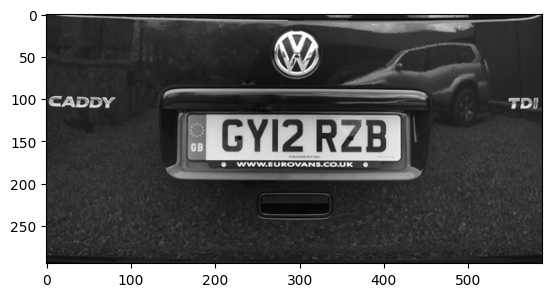

In [2]:
img = cv2.imread('images/test.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_GRAY2RGB))

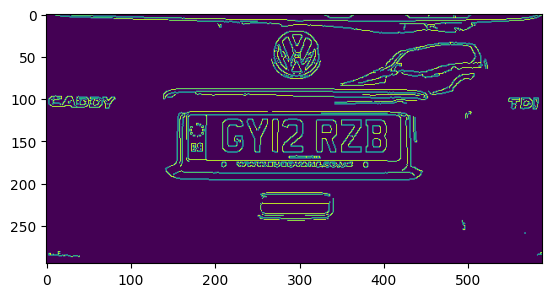

In [3]:
bfiller = cv2.bilateralFilter(gray, 11, 11, 17)
edged = cv2.Canny(bfiller, 30, 200)
plt.imshow(edged)

In [9]:
keypoints= cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours= imutils.grab_contours(keypoints)

In [14]:
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:10]

In [15]:
location= None
for contour in contours:
    approx= cv2.approxPolyDP(contour,10,True)
    if len(approx) ==4:
        location=approx
        break

In [16]:
mask=np.zeros(gray.shape,np.uint8)
new_image=cv2.drawContours(mask, [location], 0, 255, -1)

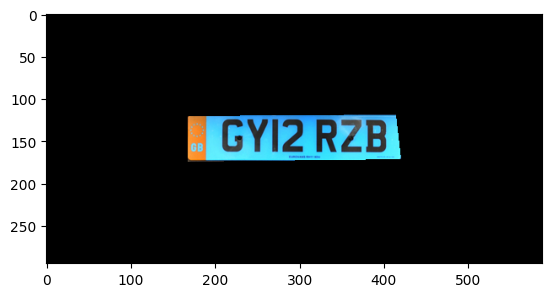

In [17]:
new_image=cv2.bitwise_and(img,img,mask=mask)
plt.imshow(new_image)

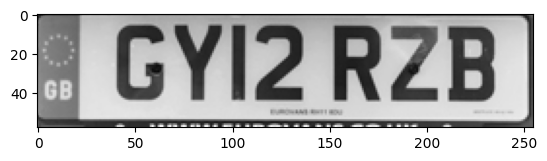

In [18]:
(x, y) = np.where(mask == 255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+3, y1:y2+3]
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [21]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
print(result)

[([[36, 0], [244, 0], [244, 54], [36, 54]], 'GYI2 RZB', 0.9345409572888455)]


In [24]:
text=result[0][1]

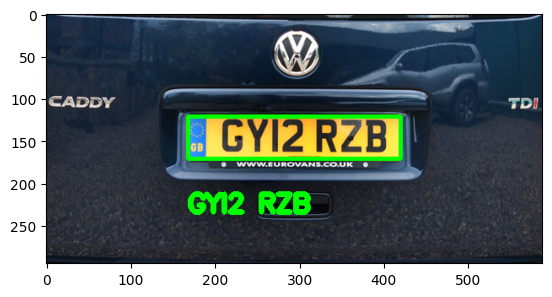

In [25]:
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text = text, org = (approx[0][0][0], approx[1][0][1]+60), fontFace = font, fontScale = 1, color = (0, 255, 0), thickness = 5)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255, 0), 3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))